In [88]:
# Load Libraries

import pandas as pd
import re
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

## Data Loading and Preprocessing

In [25]:
"""# Initialize an empty DataFrame
combined_data = pd.DataFrame()

# Excel file path
file_path = 'Green_3PLs_1.xlsx'

# Loop through the years
for year in range(2017, 2024):
    # Read the sheet for the year
    data = pd.read_excel(file_path, sheet_name=str(year))
    # Add a 'Year' column
    data['Year'] = year
    # Append to the combined DataFrame
    combined_data = pd.concat([combined_data, data], ignore_index=True)

combined_data.info()"""

"# Initialize an empty DataFrame\ncombined_data = pd.DataFrame()\n\n# Excel file path\nfile_path = 'Green_3PLs_1.xlsx'\n\n# Loop through the years\nfor year in range(2017, 2024):\n    # Read the sheet for the year\n    data = pd.read_excel(file_path, sheet_name=str(year))\n    # Add a 'Year' column\n    data['Year'] = year\n    # Append to the combined DataFrame\n    combined_data = pd.concat([combined_data, data], ignore_index=True)\n\ncombined_data.info()"

In [2]:
# Excel file path
file_path = 'Green_3PLs_1.xlsx'

# Read all sheets from the Excel file into a single pandas DataFrame
all_data = pd.read_excel(file_path, sheet_name=None)

# Combine all the data from different sheets into a single DataFrame
combined_data = pd.DataFrame()
for year, data in all_data.items():
    # Assuming the year is the sheet name, which should be converted to an integer
    data['Year'] = int(year)
    combined_data = pd.concat([combined_data, data], ignore_index=True)

combined_data.head()

,Company,IBL_Yr,Reduce greenhouse gas emissions,Use alternative fuels/energy sources,Reuse/recycling program,Reduce energy usage,Sustainable packaging,Sustainably source materials,Energy efficient lighting,Use wastewater,...,Increase airspace efficiency,Reduce waste,Freight consolidation,Route optimization,Idling programs,Electric vehicle evaluation,Network optimization,Sustainability reports,Limit/eliminate plastic bottle\nand other disposable beverage\ncontainer usage,Optimize yard performance
0,A. Duie Pyle,2023.0,0,1,1,1,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska Air Cargo,2023.0,1,1,1,1,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAA CooperTransportation,2023.0,1,1,1,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alliance Shippers Inc.,2023.0,1,1,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ArcBest,2023.0,1,1,1,1,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 58 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Company                                                                                            525 non-null    object 
 1   IBL_Yr                                                                                             522 non-null    float64
 2   Reduce greenhouse gas emissions                                                                    525 non-null    int64  
 3   Use alternative fuels/energy sources                                                               525 non-null    int64  
 4   Reuse/recycling program                                                                            525 non-null    int64  

In [3]:
# Handle Missing Data
# Drop columns with any missing values
cleaned_data = combined_data.dropna(axis=1)

print(cleaned_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 26 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Company                                                                                            525 non-null    object
 1   Reduce greenhouse gas emissions                                                                    525 non-null    int64 
 2   Use alternative fuels/energy sources                                                               525 non-null    int64 
 3   Reuse/recycling program                                                                            525 non-null    int64 
 4   Reduce energy usage                                                                                525 non-null    object
 5   S

In [4]:
# why is the 'Reduce energy usage' column an object type?
print(cleaned_data['Reduce energy usage'].unique())

# Replace 'O' with 0 in the 'Reduce energy usage' column
cleaned_data['Reduce energy usage'] = cleaned_data['Reduce energy usage'].replace('O', 0)

# After replacement, convert the entire column to integer
cleaned_data['Reduce energy usage'] = cleaned_data['Reduce energy usage'].astype(int)

# Verify the change
print(cleaned_data['Reduce energy usage'].unique())

[1 0 'O']
[1 0]


<ipython-input-4-ee2613f81d39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Reduce energy usage'] = cleaned_data['Reduce energy usage'].replace('O', 0)
<ipython-input-4-ee2613f81d39>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Reduce energy usage'] = cleaned_data['Reduce energy usage'].astype(int)


In [31]:
"""# Standardize company names
cleaned_data['Company'] = cleaned_data['Company'].str.strip()  # Remove any leading/trailing whitespace
cleaned_data['Company'] = cleaned_data['Company'].str.upper()  # Convert to uppercase for consistency

# Check for rows where the company name might be inconsistent
print("Number of unique company names:", len(cleaned_data['Company'].unique()))
print("Unique company names:", cleaned_data['Company'].unique())"""

Number of unique company names: 229
Unique company names: ['A. DUIE PYLE' 'ALASKA AIR CARGO' 'AAA COOPERTRANSPORTATION'
 'ALLIANCE SHIPPERS INC.' 'ARCBEST' 'AMERICOLD' 'AVERITT EXPRESS'
 'BETTAWAY SUPPLY CHAIN SERVICES' 'BOLLORÉ LOGISTICS'
 'BROWN INTEGRATED LOGISTICS' 'C.H. ROBINSON' 'CHEP'
 'CJ LOGISTICS AMERICA' 'CROWLEY' 'CROWN EQUIPMENT' 'CT LOGISTICS'
 'DHL SUPPLY CHAIN' 'DHX-DEPENDABLE HAWAIIAN EXPRESS'
 'DIMERCO EXPRESS GROUP' 'EAST COAST WAREHOUSE & DISTRIBUTION'
 'ECHO GLOBAL LOGISTICS' 'ENGLAND LOGISTICS' 'ESTES EXPRESS LINES'
 'EVERGREEN SHIPPING AGENCY (AMERICA) CORP.' 'FEDEX'
 'FLS TRANSPORTATION SERVICES' 'FST LOGISTICS' 'GEODIS' 'HOLMAN LOGISTICS'
 'HUB GROUP' 'HYSTER COMPANY' 'IGPS LOGISTICS' 'INMAR INTELLIGENCE'
 'J.B. HUNT TRANSPORT SERVICES' 'KAMPS' 'KENAN ADVANTAGE GROUP'
 'KENCO GROUP' 'LANDSTAR SYSTEM' 'LOGISTICS PLUS' 'LYNDEN'
 'MARTEN TRANSPORT' 'MATSON NAVIGATION COMPANY' 'NFI INDUSTRIES'
 'NORTHWEST SEAPORT ALLIANCE' 'NUSSBAUM TRANSPORTATION' 'ODW LOGISTICS'

<ipython-input-31-913b11c703f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Company'] = cleaned_data['Company'].str.strip()  # Remove any leading/trailing whitespace
<ipython-input-31-913b11c703f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Company'] = cleaned_data['Company'].str.upper()  # Convert to uppercase for consistency


In [5]:
# Cleaning the company names

"""# Replace newline characters and extra spaces, and trim whitespace
cleaned_data['Company'] = cleaned_data['Company'].str.replace('\n', ' ', regex=False)
cleaned_data['Company'] = cleaned_data['Company'].str.replace(' +', ' ', regex=True)
cleaned_data['Company'] = cleaned_data['Company'].str.strip()"""

def standardize_names(name):
    # Convert to uppercase
    name = name.upper()
    # Remove known redundancies
    redundancies = ['INC.', 'CORPORATION', 'LLC', 'LP', 'LTD', 'GROUP', '(KAG)']
    for red in redundancies:
        name = name.replace(red, '')
    # Standardize common words
    name = name.replace('TRANSPORTATION', 'TRANSPORT')
    # Remove any line breaks and extra spaces
    name = re.sub(' +', ' ', name.replace('\n', ' ')).strip()
    # Return the standardized name
    return name

# Apply the standardization function to the 'Company' column
cleaned_data['Company'] = cleaned_data['Company'].apply(standardize_names)

# Check for rows where the company name might be inconsistent
print("Number of unique company names:", len(cleaned_data['Company'].unique()))
print("Unique company names:", cleaned_data['Company'].unique())

Number of unique company names: 210
Unique company names: ['A. DUIE PYLE' 'ALASKA AIR CARGO' 'AAA COOPERTRANSPORT'
 'ALLIANCE SHIPPERS' 'ARCBEST' 'AMERICOLD' 'AVERITT EXPRESS'
 'BETTAWAY SUPPLY CHAIN SERVICES' 'BOLLORÉ LOGISTICS'
 'BROWN INTEGRATED LOGISTICS' 'C.H. ROBINSON' 'CHEP'
 'CJ LOGISTICS AMERICA' 'CROWLEY' 'CROWN EQUIPMENT' 'CT LOGISTICS'
 'DHL SUPPLY CHAIN' 'DHX-DEPENDABLE HAWAIIAN EXPRESS' 'DIMERCO EXPRESS'
 'EAST COAST WAREHOUSE & DISTRIBUTION' 'ECHO GLOBAL LOGISTICS'
 'ENGLAND LOGISTICS' 'ESTES EXPRESS LINES'
 'EVERGREEN SHIPPING AGENCY (AMERICA) CORP.' 'FEDEX'
 'FLS TRANSPORT SERVICES' 'FST LOGISTICS' 'GEODIS' 'HOLMAN LOGISTICS'
 'HUB' 'HYSTER COMPANY' 'IGPS LOGISTICS' 'INMAR INTELLIGENCE'
 'J.B. HUNT TRANSPORT SERVICES' 'KAMPS' 'KENAN ADVANTAGE' 'KENCO'
 'LANDSTAR SYSTEM' 'LOGISTICS PLUS' 'LYNDEN' 'MARTEN TRANSPORT'
 'MATSON NAVIGATION COMPANY' 'NFI INDUSTRIES' 'NORTHWEST SEAPORT ALLIANCE'
 'NUSSBAUM TRANSPORT' 'ODW LOGISTICS' 'ODYSSEY LOGISTICS & TECHNOLOGY'
 'OLD DOMI

<ipython-input-5-6888900f46af>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Company'] = cleaned_data['Company'].apply(standardize_names)


In [6]:
def normalize_unicode(text):
    return unicodedata.normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')

# function that parses the company names and uses only the first word according to these rules
def simplify_company_name(name):
    # Normalize Unicode characters
    name = normalize_unicode(name)
    # Define exceptions where the first two words should be used
    exceptions = {'.', 'LOGISTICS', 'THE', 'AMERICAN', 'CANADIAN', 'NORTH', 'SOUTH', 'TRANS', 'TRANSPORT', 'EAST', 'WEST'}
    # Split the name into words
    words = name.split()
    # Define a set of single-word company names that should not be shortened
    single_word_exceptions = {'A.', 'C.H.', 'J.B.'}
    # Define a dictionary of known abbreviations
    known_abbreviations = {
        'A.': 'A DUIE PYLE',
        'C.H.': 'CH ROBINSON',
        'J.B.': 'JB HUNT',
    }
    # Use full name if the first word is 'PORT'
    if words[0] == 'THE':
        simplified_name = words[1]
    elif words[0].startswith('PORT'):
        simplified_name = name
    # Replace known abbreviations
    elif words[0] in known_abbreviations:
        simplified_name = known_abbreviations[words[0]]
    # Use the first two words if the first word is in the exceptions
    elif words[0].upper() in exceptions:
        simplified_name = ' '.join(words[:2])
    # Otherwise, just use the first word
    else:
        simplified_name = words[0]
    return simplified_name

# Apply the function to the 'Company' column
cleaned_data['Simplified Company'] = cleaned_data['Company'].apply(simplify_company_name)

# Check for rows where the company name might be inconsistent
print("Number of unique company names:", len(cleaned_data['Simplified Company'].unique()))
print("Unique company names:", cleaned_data['Simplified Company'].unique())

Number of unique company names: 164
Unique company names: ['A DUIE PYLE' 'ALASKA' 'AAA' 'ALLIANCE' 'ARCBEST' 'AMERICOLD' 'AVERITT'
 'BETTAWAY' 'BOLLORE' 'BROWN' 'CH ROBINSON' 'CHEP' 'CJ' 'CROWLEY' 'CROWN'
 'CT' 'DHL' 'DHX-DEPENDABLE' 'DIMERCO' 'EAST COAST' 'ECHO' 'ENGLAND'
 'ESTES' 'EVERGREEN' 'FEDEX' 'FLS' 'FST' 'GEODIS' 'HOLMAN' 'HUB' 'HYSTER'
 'IGPS' 'INMAR' 'JB HUNT' 'KAMPS' 'KENAN' 'KENCO' 'LANDSTAR'
 'LOGISTICS PLUS' 'LYNDEN' 'MARTEN' 'MATSON' 'NFI' 'NORTHWEST' 'NUSSBAUM'
 'ODW' 'ODYSSEY' 'OLD' 'ORBIS' 'PECO' 'PENSKE' 'PITT'
 'PORT OF LOS ANGELES' 'RAYMOND' 'REDWOOD' 'RINCHEM' 'ROEHL' 'ROMARK'
 'RUAN' 'RYDER' 'SAIA' 'SCAN' 'SCHNEIDER' 'SOUTHEASTERN' 'SUNSET' 'SYMBIA'
 'SHIPPERS' 'TOYOTA' 'TRINITY' 'TUCKER' 'UNION' 'UPS' 'WERNER' 'WSI'
 'YALE' 'ARRIVE' 'CANADIAN NATIONAL' 'CARGO' 'CEVA' 'CSX' 'ENVISTA'
 'FLOCK' 'FORWARD' 'LUFTHANSA' 'MPO' 'ONEPAK' 'PERFORMANCE' 'PLASTIC'
 'PROSPONSIVE' 'RJW' 'TCI' 'TRANSPORT INSIGHT' 'USA' 'WABTEC' 'WESCO'
 'YUSEN' 'DSV' 'ERB' 'FREIGHTCENTER' 'GEO

<ipython-input-6-20ee38793b35>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Simplified Company'] = cleaned_data['Company'].apply(simplify_company_name)


In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 27 columns):
 #   Column                                                                                             Non-Null Count  Dtype 
---  ------                                                                                             --------------  ----- 
 0   Company                                                                                            525 non-null    object
 1   Reduce greenhouse gas emissions                                                                    525 non-null    int64 
 2   Use alternative fuels/energy sources                                                               525 non-null    int64 
 3   Reuse/recycling program                                                                            525 non-null    int64 
 4   Reduce energy usage                                                                                525 non-null    int64 
 5   S

<ipython-input-12-7f8ad2622547>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust the padding


<Figure size 1500x1000 with 0 Axes>

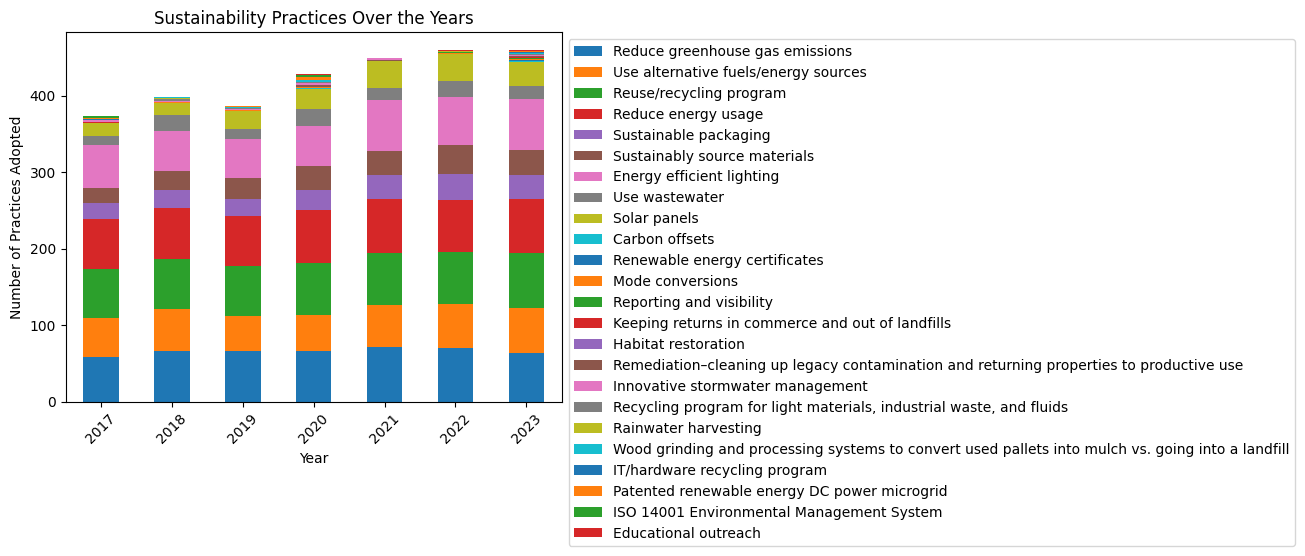

In [12]:
# Trends: Number of practices adopted each year
# Barchart
practices_per_year = cleaned_data.drop(['Company', 'Simplified Company'], axis=1).groupby('Year').sum()
plt.figure(figsize=(15, 10))  # Increase the figure size
practices_per_year.plot(kind='bar', stacked=True)  # Stack the bars for better visibility
plt.title('Sustainability Practices Over the Years')
plt.ylabel('Number of Practices Adopted')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better visibility
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # Move the legend out of the plot
plt.tight_layout()  # Adjust the padding
plt.show()

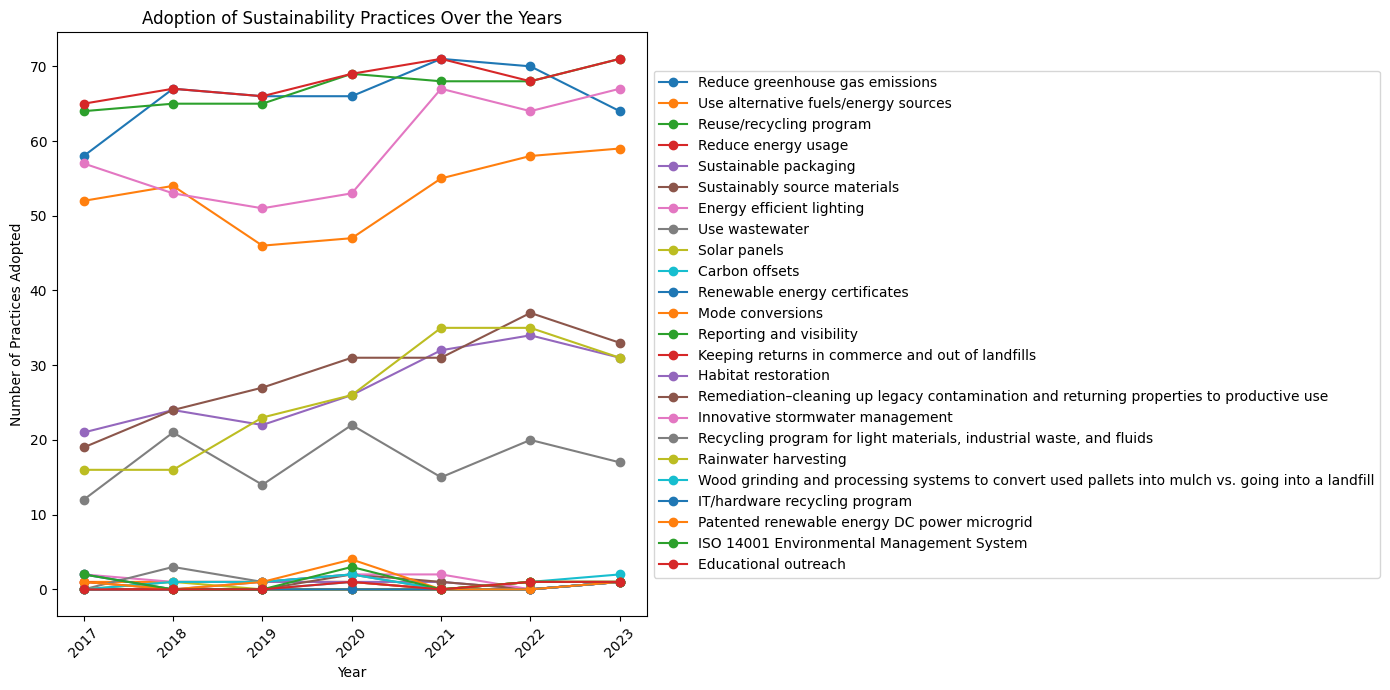

In [13]:
# Line Graph
# Set the figure size for readability
plt.figure(figsize=(14, 7))

# Loop through each sustainability practice column to create a line plot for each
for column in practices_per_year.columns:
    plt.plot(practices_per_year.index, practices_per_year[column], marker='o', label=column)

plt.title('Adoption of Sustainability Practices Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Practices Adopted')
plt.xticks(practices_per_year.index, rotation=45)  # Rotate the x-axis labels for better visibility
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place legend outside
plt.tight_layout()  # Adjust the padding
plt.show()

In [19]:
# Adoption of each company over the years

# Create a pivot table
pivot_table = cleaned_data.pivot_table(index='Simplified Company', columns='Year', aggfunc='sum', fill_value=0)

# The pivot_table contains the sum of all sustainability practices for each company across each year
# Might need to drop a multi-level column index if it exists after pivot_table is created
#pivot_table.columns = pivot_table.columns.droplevel(0)  # Drops the top level if multi-level index exists

# Display the pivot table
#print(pivot_table)

# Export this to a CSV file for further use
#pivot_table.to_csv('company_practices_over_years.csv')

pivot_table.head()

Carbon offsets                                   Company  \
Year                         2017 2018 2019 2020 2021 2022 2023        2017   
Simplified Company                                                            
48FORTY                         0    0    0    0    0    0    0           0   
A DUIE PYLE                     0    0    0    0    0    0    0           0   
AAA                             0    0    0    0    0    0    0  AAA COOPER   
AGILITY                         0    0    0    0    0    0    0           0   
ALASKA                          0    0    0    0    0    0    0           0   

                                                                               \
Year                                2018                                 2019   
Simplified Company                                                              
48FORTY                48FORTY SOLUTIONS                                    0   
A DUIE PYLE                            0                                    0   
AAA                 AAA COOPER TRANSPORT                 AAA COOPER TRANSPORT   
AGILITY                                0  AGILITY GLOBAL INTEGRATED LOGISTICS   
ALASKA                  ALASKA AIR CARGO                     ALASKA AIR CARGO   

                    ... Use wastewater            \
Year                ...           2021 2022 2023   
Simplified Company  ...                            
48FORTY             ...              0    0    0   
A DUIE PYLE         ...              1    0    1   
AAA                 ...              1    1    1   
AGILITY             ...              0    0    0   
ALASKA              ...              0    0    1   

                   Wood grinding and processing systems to convert used pallets into mulch vs. going into a landfill  \
Year                                                                                                            2017   
Simplified Company                                                                                                     
48FORTY                                                             0                                                  
A DUIE PYLE                                                         0                                                  
AAA                                                                 0                                                  
AGILITY                                                             0                                                  
ALASKA                                                              0                                                  

                                                  
Year               2018 2019 2020 2021 2022 2023  
Simplified Company                                
48FORTY               0    0    0    0    0    0  
A DUIE PYLE           0    0    0    0    0    0  
AAA                   0    0    0    0    0    0  
AGILITY               0    0    0    0    0    0  
ALASKA                0    0    0    0    0    0  

[5 rows x 175 columns]

In [21]:
# Group the data by 'Simplified Company' and 'Year' and sum across all practices
company_yearly_adoption = cleaned_data.drop(['Company'], axis=1).groupby(['Simplified Company', 'Year']).sum()

# Sum across all sustainability practices
company_yearly_adoption['Total Practices'] = company_yearly_adoption.sum(axis=1)

# Reset the index to turn the group-by 'Year' into a column
company_yearly_adoption = company_yearly_adoption.reset_index()

# Pivot the data to get 'Simplified Company' as rows and 'Year' as columns
company_adoption_pivot = company_yearly_adoption.pivot(index='Simplified Company', columns='Year', values='Total Practices')

# Fill any NaN values that arise from companies not having data for a year with zeros
#company_adoption_pivot = company_adoption_pivot.fillna(0).astype(int)

# Now display the pivot table
#print(company_adoption_pivot)

company_adoption_pivot.head()

Year                2017  2018  2019  2020  2021  2022  2023
Simplified Company                                          
48FORTY              NaN   3.0   NaN   4.0   NaN   NaN   NaN
A DUIE PYLE          NaN   NaN   NaN   NaN   7.0   NaN   6.0
AAA                  1.0   5.0   5.0   6.0   6.0   5.0   8.0
AGILITY              NaN   NaN   6.0   NaN   NaN   NaN   NaN
ALASKA               NaN   3.0   1.0  10.0   NaN   NaN   7.0
...                  ...   ...   ...   ...   ...   ...   ...
WSI                  6.0   5.0   5.0   8.0   6.0   4.0   5.0
XPO                  8.0   8.0   8.0   9.0   9.0   NaN   NaN
YALE                 3.0   5.0   5.0   5.0   5.0   5.0   5.0
YRC                  NaN   5.0   5.0   5.0   NaN   NaN   NaN
YUSEN                5.0   4.0   5.0   5.0   NaN   8.0   NaN

[164 rows x 7 columns]


Year,2017,2018,2019,2020,2021,2022,2023
Simplified Company,,,,,,,
48FORTY,NaN,3.0,NaN,4.0,NaN,NaN,NaN
A DUIE PYLE,NaN,NaN,NaN,NaN,7.0,NaN,6.0
AAA,1.0,5.0,5.0,6.0,6.0,5.0,8.0
AGILITY,NaN,NaN,6.0,NaN,NaN,NaN,NaN
ALASKA,NaN,3.0,1.0,10.0,NaN,NaN,7.0


In [25]:
# Count the non-null values for each company across the year columns
# A company that was featured every year will have no NaN values across all the year columns
featured_every_year = company_adoption_pivot.notnull().all(axis=1)

# Sum the True values in 'featured_every_year' to get the number of companies featured every year
number_companies_every_year = featured_every_year.sum()

print(f'Number of companies featured every year from 2017 to 2023: {number_companies_every_year}')


Number of companies featured every year from 2017 to 2023: 27


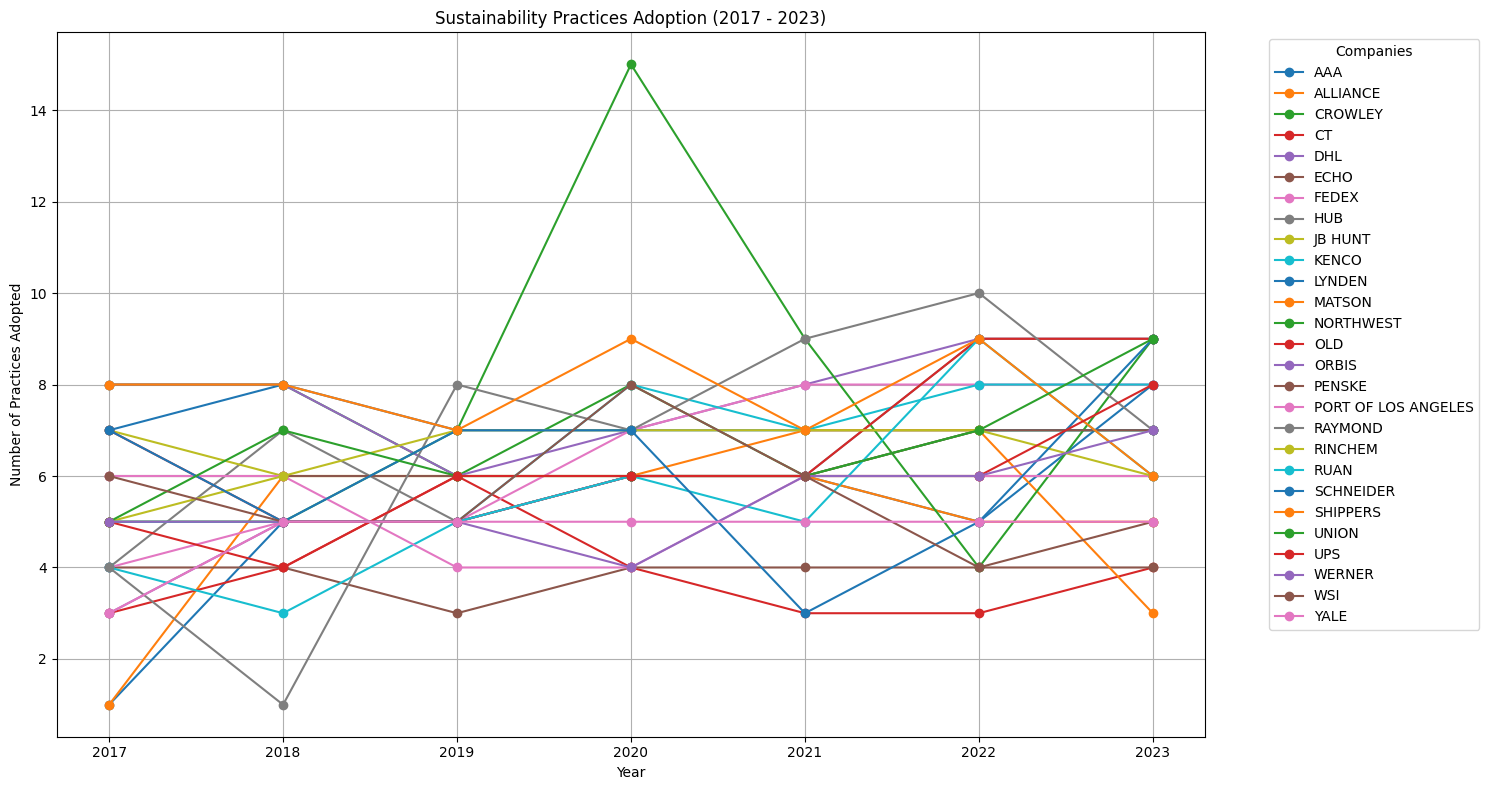

In [26]:
# Can't visualize the adoption of sustainability practice of about 160 compaines instead we do it for  companies featured every year


# This line gives us a boolean Series where True indicates a company has been featured every year
companies_present_every_year_filter = company_adoption_pivot.notnull().all(axis=1)

# Get the names of the companies that have been featured every year
companies_featured_every_year = companies_present_every_year_filter[companies_present_every_year_filter].index.tolist()

# Create a plot for these companies
plt.figure(figsize=(15, 8))

# Iterate over the names of the companies and plot their data
for company in companies_featured_every_year:
    plt.plot(company_adoption_pivot.columns, company_adoption_pivot.loc[company], marker='o', label=company)

# Configure the plot
plt.title('Sustainability Practices Adoption (2017 - 2023)')
plt.xlabel('Year')
plt.ylabel('Number of Practices Adopted')
plt.legend(title='Companies', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


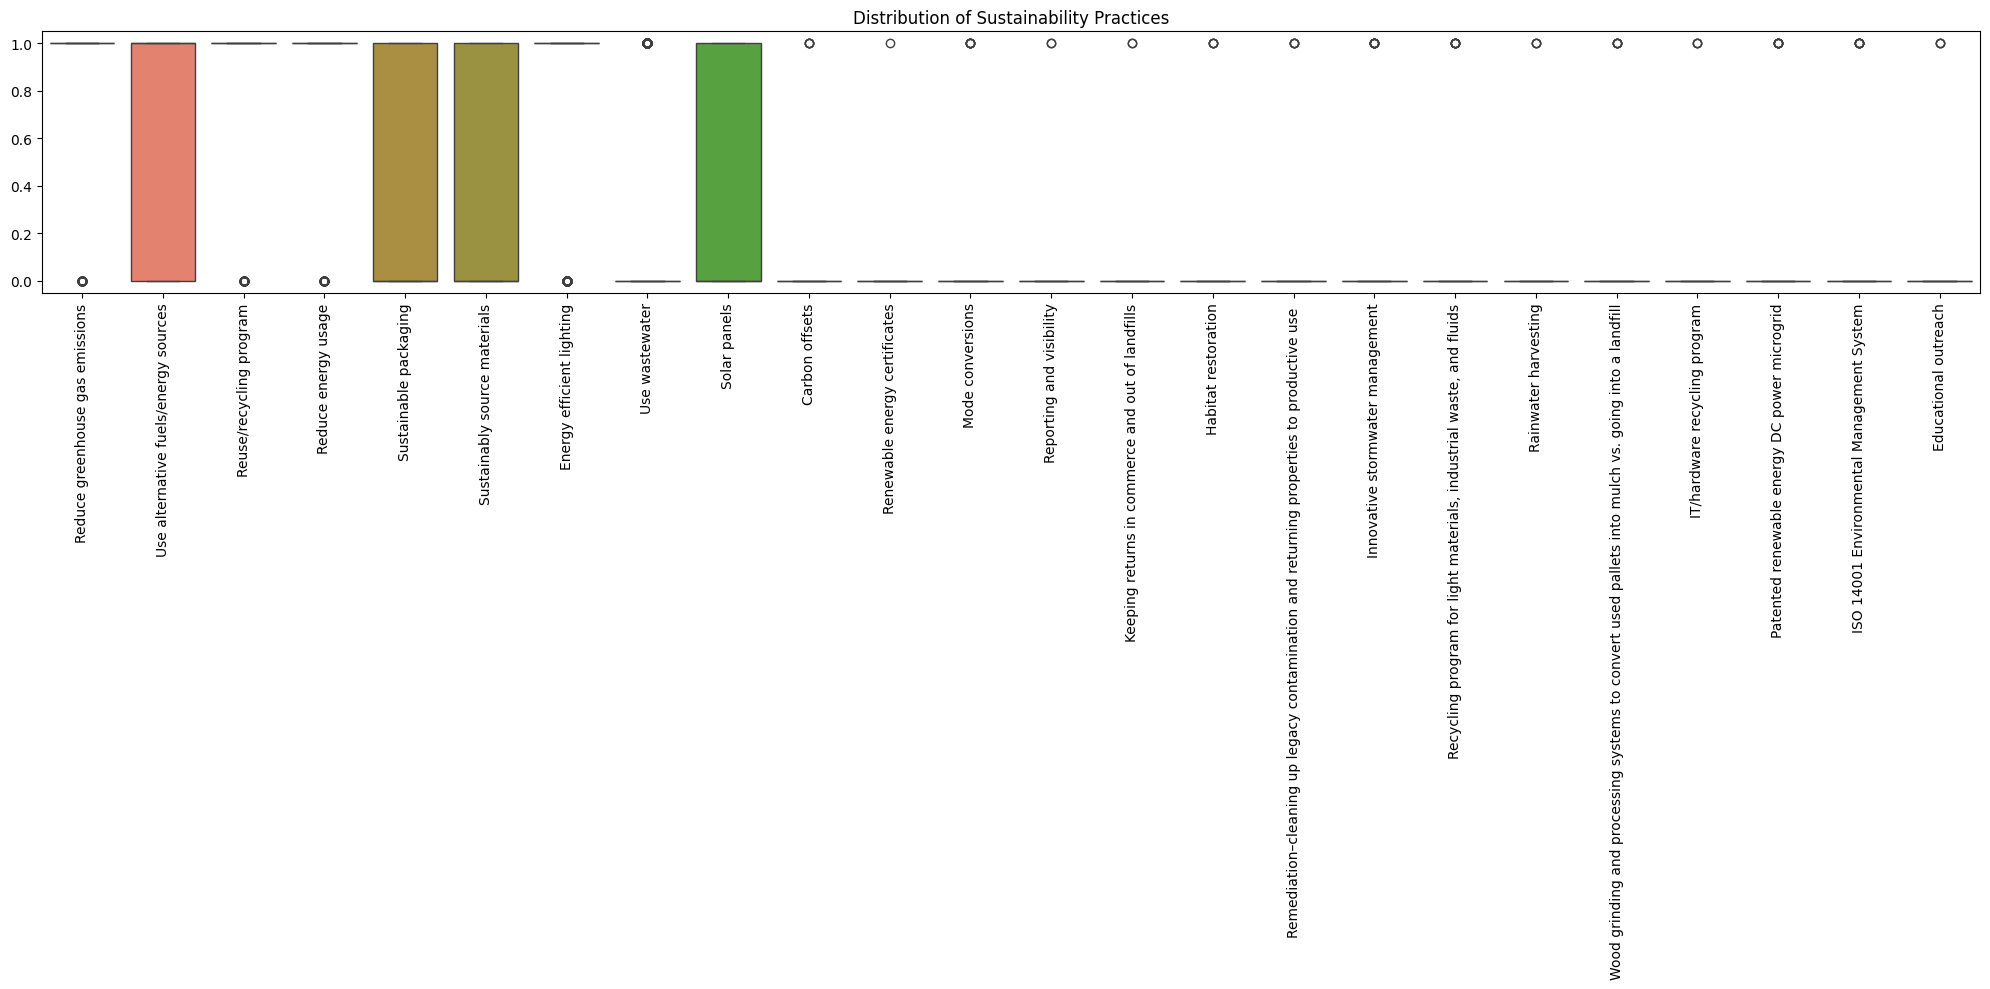

In [28]:
# Understanding Distributions and Variances: Boxplot

# Set a larger figure size since we have a lot of categories
plt.figure(figsize=(20, 10))

# Create the boxplot with labels rotated for better visibility
sns.boxplot(data=cleaned_data.drop(['Company', 'Year', 'Simplified Company'], axis=1))
plt.title('Distribution of Sustainability Practices')
plt.xticks(rotation=90)  # Rotate the x-axis labels vertically
plt.tight_layout()  # Adjust the layout
plt.show()


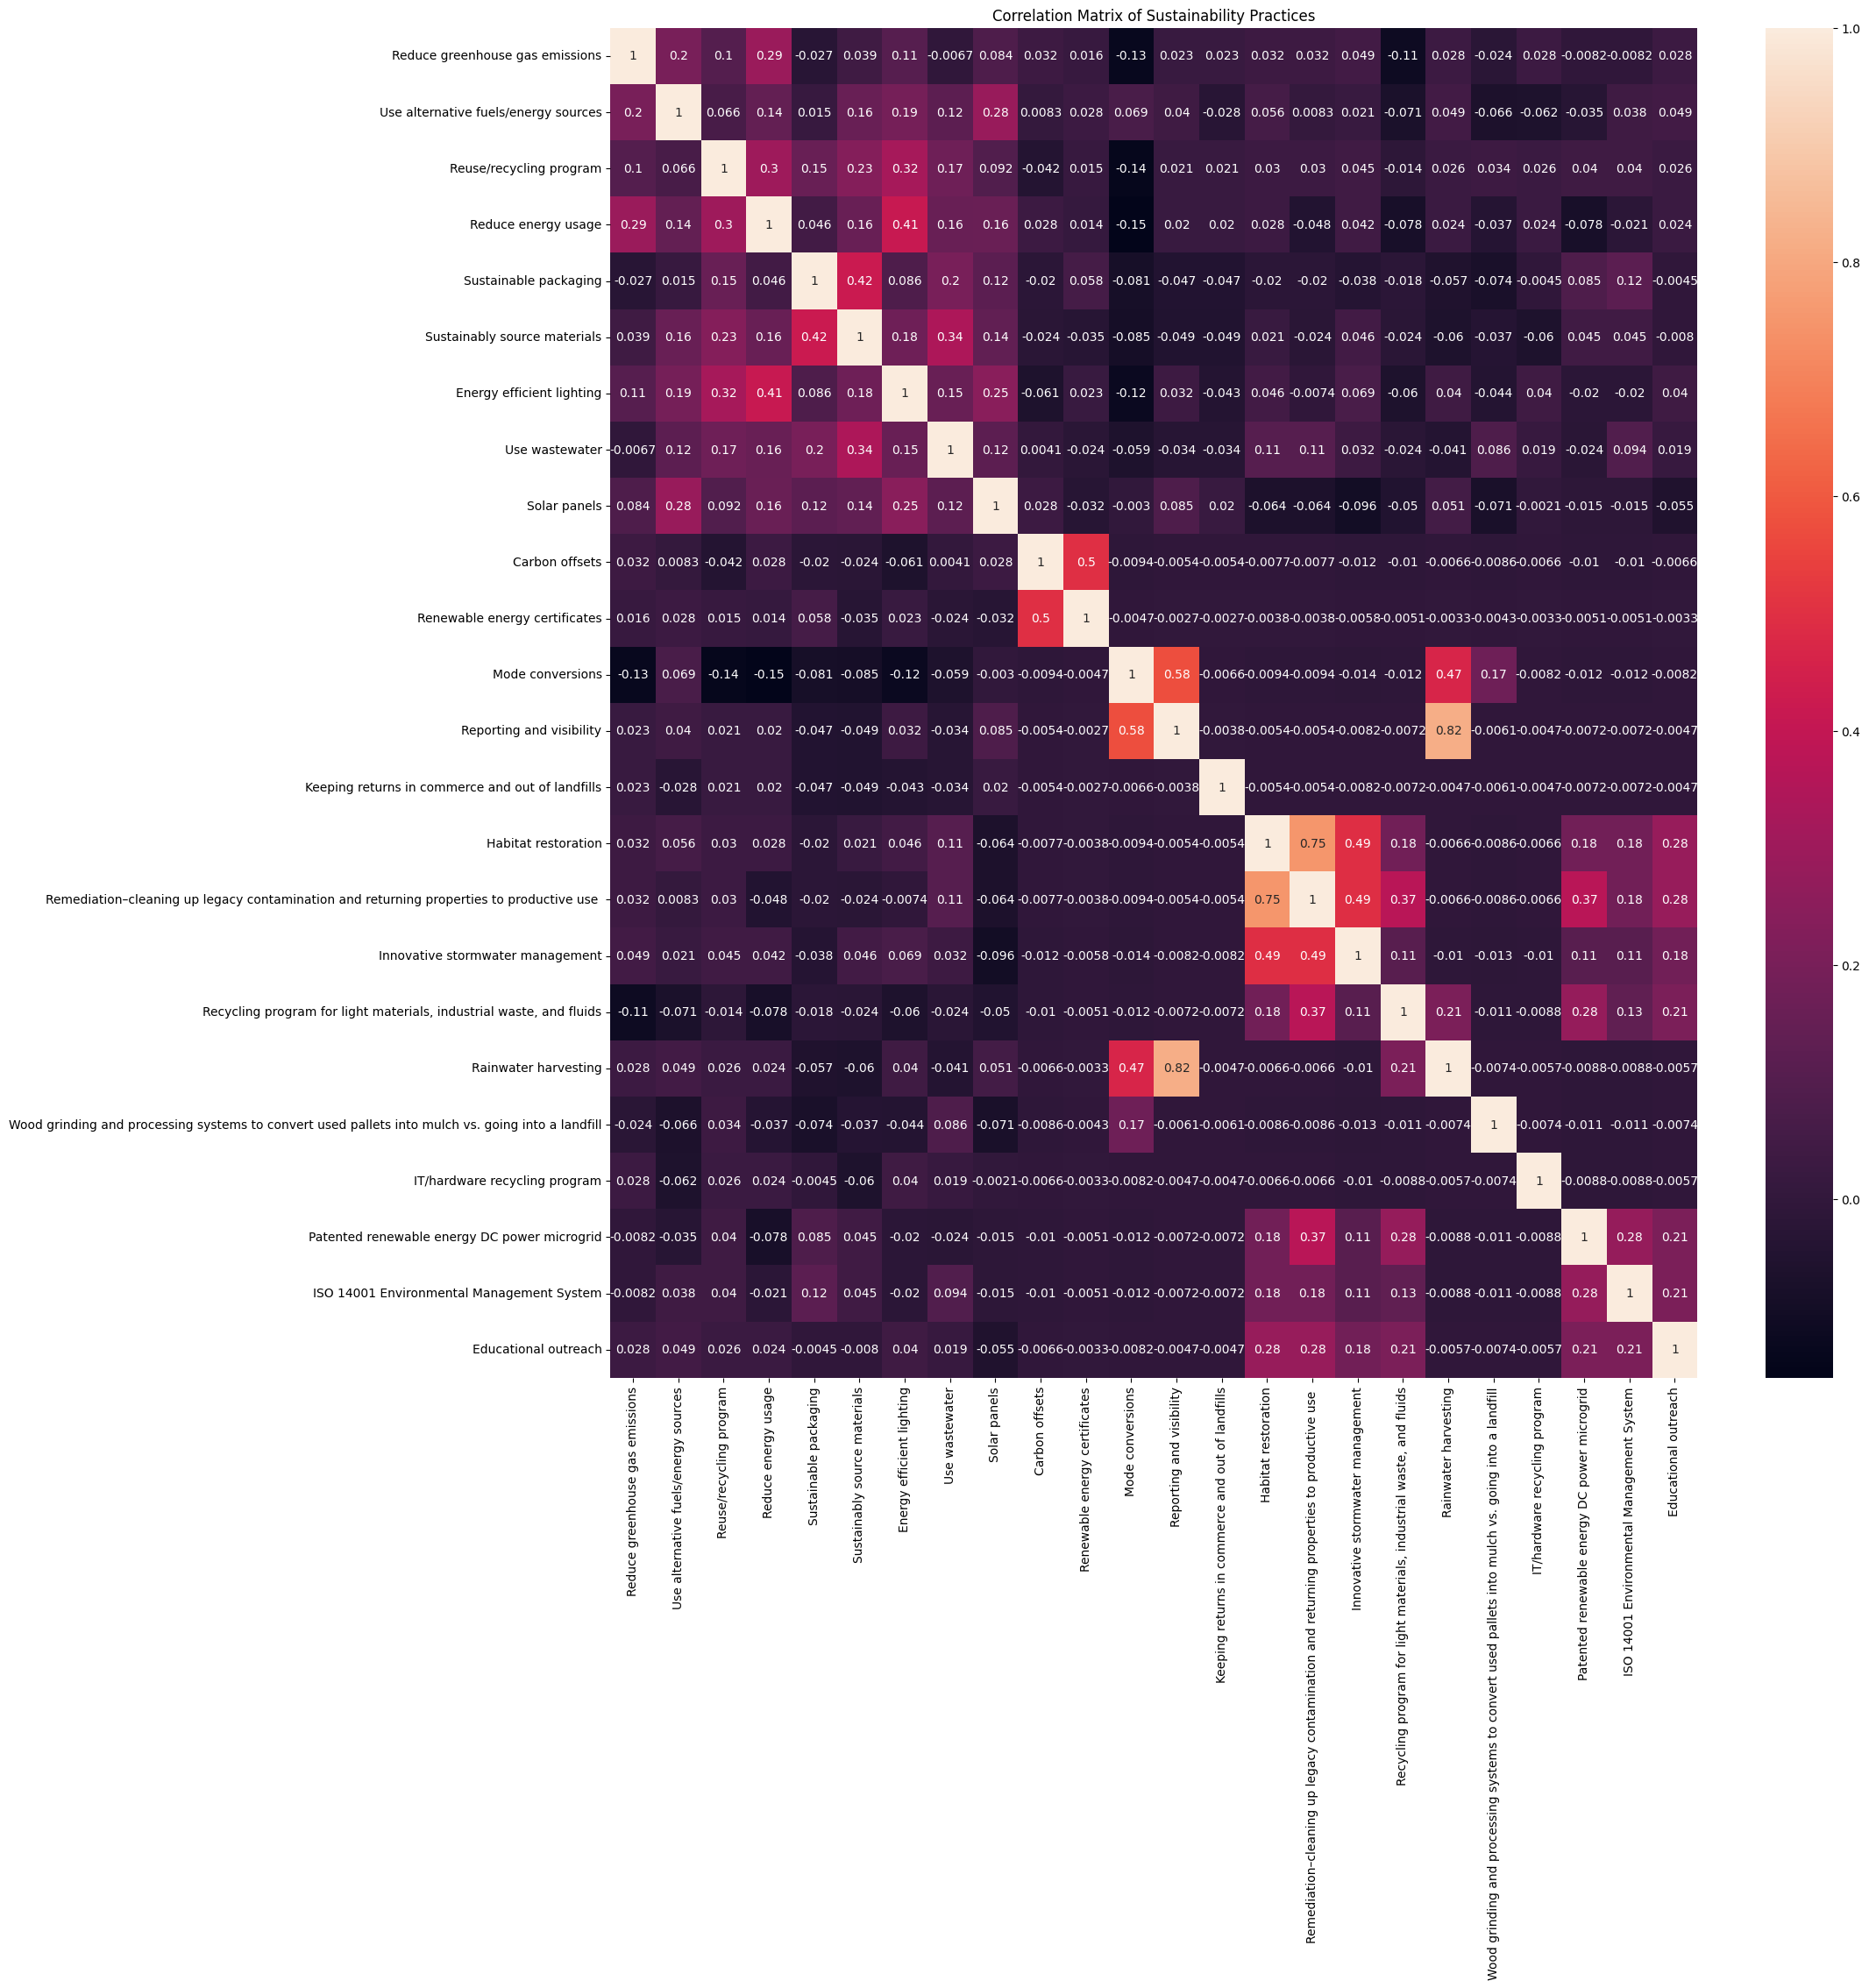

In [31]:
# Correlations: Correlation Matrix Heatmap
# Set a larger figure size since we have a lot of categories
plt.figure(figsize=(20, 20))
correlation_matrix = cleaned_data.drop(['Company', 'Year', 'Simplified Company'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Sustainability Practices')
plt.show()

## Model Building

### K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

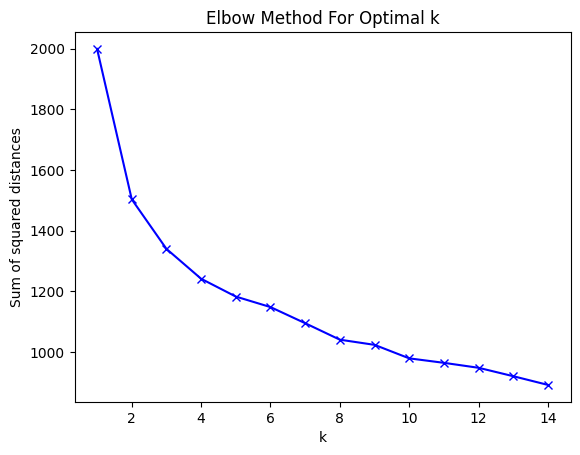

In [36]:
# Drop the 'Company' column
pivot_table_dropped = pivot_table.drop('Company', level=0, axis=1)

# Determine optimal k
# Calculate the sum of squared distances for different values of k
sum_of_squared_distances = []
K = range(1, 15)  # Try different values for k, here from 1 to 14
for k in K:
    km = KMeans(n_clusters=k, random_state=40)
    km = km.fit(pivot_table_dropped)
    sum_of_squared_distances.append(km.inertia_)

# Plot the elbow curve
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


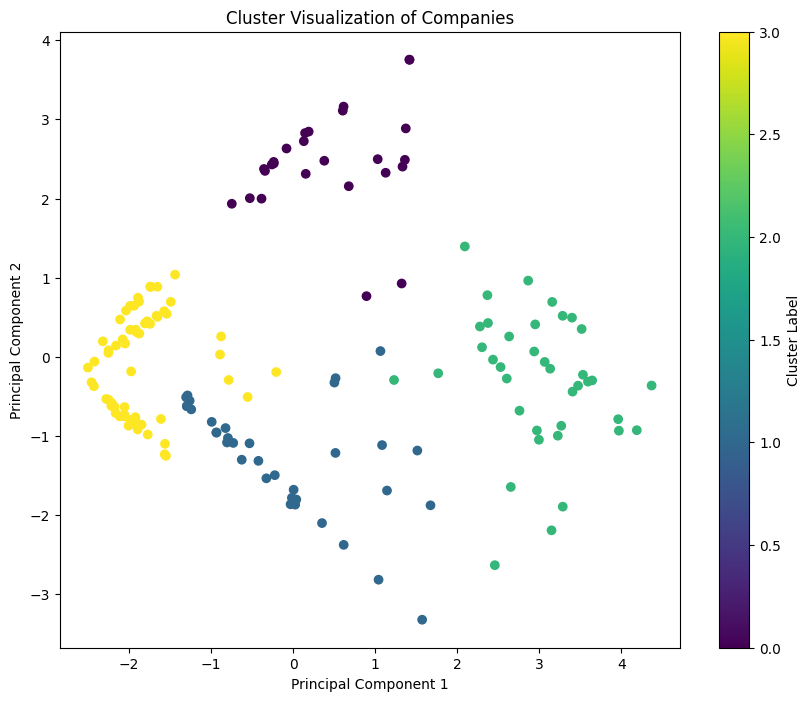

Carbon offsets                                \
Year                         2017 2018 2019 2020 2021 2022 2023   
Simplified Company                                                
48FORTY                         0    0    0    0    0    0    0   
A DUIE PYLE                     0    0    0    0    0    0    0   
AAA                             0    0    0    0    0    0    0   
AGILITY                         0    0    0    0    0    0    0   
ALASKA                          0    0    0    0    0    0    0   

                   Educational outreach            ... Use wastewater       \
Year                               2017 2018 2019  ...           2022 2023   
Simplified Company                                 ...                       
48FORTY                               0    0    0  ...              0    0   
A DUIE PYLE                           0    0    0  ...              0    1   
AAA                                   0    0    0  ...              1    1   
AGILITY                               0    0    0  ...              0    0   
ALASKA                                0    0    0  ...              0    1   

                   Wood grinding and processing systems to convert used pallets into mulch vs. going into a landfill  \
Year                                                                                                            2017   
Simplified Company                                                                                                     
48FORTY                                                             0                                                  
A DUIE PYLE                                                         0                                                  
AAA                                                                 0                                                  
AGILITY                                                             0                                                  
ALASKA                                                              0                                                  

                                                 Cluster  
Year               2018 2019 2020 2021 2022 2023          
Simplified Company                                        
48FORTY               0    0    0    0    0    0       3  
A DUIE PYLE           0    0    0    0    0    0       0  
AAA                   0    0    0    0    0    0       2  
AGILITY               0    0    0    0    0    0       3  
ALASKA                0    0    0    0    0    0       1  

[5 rows x 169 columns]

In [48]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=40)
cluster_labels = kmeans.fit_predict(pivot_table_dropped)

# Attach the cluster labels to the original DataFrame
pivot_table_dropped['Cluster'] = cluster_labels

# Apply PCA for visualization purposes
pca = PCA(n_components=2)
pca_components = pca.fit_transform(pivot_table_dropped)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.title('Cluster Visualization of Companies')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

pivot_table_dropped.head()

In [49]:
# Calculate the silhouette score for the clustering
silhouette_avg = silhouette_score(pivot_table_dropped, cluster_labels)

print(f'The average silhouette score for the clustering is: {silhouette_avg}')

The average silhouette score for the clustering is: 0.24420616438399026


### Adoption Prediction

In [60]:
# Predict whether a company will adopt a new sustainability practice in the next year based on its adoption patterns in previous years

# Create a new DataFrame to store the information about new practice adoption
new_practices_df = company_adoption_pivot.copy()

# Ensure that years are strings if they are the column names
years = new_practices_df.columns[1:].astype(str)

# Create new columns for each year indicating whether a new practice was adopted
for year in range(2017, 2023):
    current_year = year
    next_year = year + 1
    new_practices_df[f'New_Practice_Adopted_{next_year}'] = (new_practices_df[next_year] - new_practices_df[current_year] > 0).astype(int)

# Drop the original year columns as they are not needed for prediction
new_practices_df.drop([year for year in range(2017, 2024)], axis=1, inplace=True)
new_practices_df.head()

# The new columns are added to the df DataFrame
# Now we should remove any rows with NaN values resulting from the difference operation
#new_practices_df.dropna(inplace=True)


Year,New_Practice_Adopted_2018,New_Practice_Adopted_2019,New_Practice_Adopted_2020,New_Practice_Adopted_2021,New_Practice_Adopted_2022,New_Practice_Adopted_2023
Simplified Company,,,,,,
48FORTY,0,0,0,0,0,0
A DUIE PYLE,0,0,0,0,0,0
AAA,1,0,1,0,0,1
AGILITY,0,0,0,0,0,0
ALASKA,0,0,1,0,0,0


In [64]:
# 'New_Practice_Adopted_2023' is the target column for 2023 adoption.

# Define features (X) using the data from 2018 to 2022
# Define label (y) using the data from 2023
features = [col for col in new_practices_df.columns if 'New_Practice_Adopted_' in col and '2023' not in col]
X = new_practices_df[features]
y = new_practices_df['New_Practice_Adopted_2023']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [62]:
# Count the values in the target variable
class_distribution = new_practices_df['New_Practice_Adopted_2023'].value_counts()

# Calculate the percentage of each class
class_percentage = new_practices_df['New_Practice_Adopted_2023'].value_counts(normalize=True) * 100

# Print the distribution and percentage
print("Class Distribution:\n", class_distribution)
print("\nClass Percentage:\n", class_percentage)

Class Distribution:
 New_Practice_Adopted_2023
0    148
1     16
Name: count, dtype: int64

Class Percentage:
 New_Practice_Adopted_2023
0    90.243902
1     9.756098
Name: proportion, dtype: float64


In [65]:
"""# Handle class imbalance using SMOTE
sm = SMOTE(random_state=40)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)"""

In [78]:
# Train a RandomForestClassifier

# Initialize the classifier with class weight set to 'balanced'
classifier = RandomForestClassifier(n_estimators=1000, random_state=40, class_weight='balanced')


classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'AUC-ROC: {roc_auc_score(y_test, y_pred)}')
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.00      0.00      0.00         3

    accuracy                           0.79        33
   macro avg       0.45      0.43      0.44        33
weighted avg       0.82      0.79      0.80        33

AUC-ROC: 0.43333333333333335
Accuracy: 0.7878787878787878


In [86]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss', class_weight='balanced')

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred_xgb))
print(f'AUC-ROC: {roc_auc_score(y_test, y_pred_xgb)}')
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       0.00      0.00      0.00         3

    accuracy                           0.91        33
   macro avg       0.45      0.50      0.48        33
weighted avg       0.83      0.91      0.87        33

AUC-ROC: 0.5
Accuracy: 0.9090909090909091


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [00:28:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in la

In [82]:
y_test

Simplified Company
SEALED               0
PROSPONSIVE          0
SCAN                 0
G&D                  0
PACKAGING            0
CROWLEY              0
WERNER               1
FLS                  0
PLASTIC              0
TRANS GLOBAL         0
CABKA                0
NORFOLK              0
BETTAWAY             0
JAXPORT              0
CEVA                 0
CROWN                0
SCHENKER             0
PORT OF BALTIMORE    0
UPS                  1
BNSF                 0
LUFTHANSA            0
BROWN                0
ARRIVE               0
AMERICOLD            0
CSX                  0
VERSACOLD            0
PERFORMANCE          0
GEODIS               1
SEABOARD             0
XPO                  0
SUNSET               0
MAINFREIGHT          0
HOLMAN               0
Name: New_Practice_Adopted_2023, dtype: int64

In [87]:
y_pred_xgb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
# Given the low frequency of the minority class and low number of data we treat the problem as an anomaly detection instead of a classification problem

# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=40)

# Fit Isolation Forest on the majority class only
iso_forest.fit(X_train[y_train == 0])

# Predict on the test set
# The Isolation Forest uses -1 to indicate outliers (anomalies) and 1 for inliers (normal points).
y_pred_iso = iso_forest.predict(X_test)
# Convert anomalies to the correct label
y_pred_iso = [1 if x == -1 else 0 for x in y_pred_iso]

# Evaluate the model
print(classification_report(y_test, y_pred_iso))
print(f'AUC-ROC: {roc_auc_score(y_test, y_pred_iso)}')
print("Accuracy:", accuracy_score(y_test, y_pred_iso))

              precision    recall  f1-score   support

           0       1.00      0.53      0.70        30
           1       0.18      1.00      0.30         3

    accuracy                           0.58        33
   macro avg       0.59      0.77      0.50        33
weighted avg       0.93      0.58      0.66        33

AUC-ROC: 0.7666666666666666
Accuracy: 0.5757575757575758


In [94]:
y_pred_iso

[0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0]